In [1]:

import pandas as pd
import numpy as np
import datetime as dt
import math
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

For some reason occationaly the GoogleBuzz Factors get messed up, therefore for this section please use the GoogleBuzzDF dataset included within the file

In [3]:
test = pd.read_csv("GoogleBuzzDF.csv")
sort_g = test.sort_values("googlebuzz") 
#Corrects for an error within the calculations (super stupid on my behalf)
#Calculations double reverse the GoogleBuzz metric (meaning for a single matchID both players will have the same Buzz Factor when it should be reversed,
#however adjusting things get really weird, so this is the mitigation used currently
sort_g["googlebuzz"] = np.where(sort_g["win"] == 0, -sort_g["googlebuzz"], sort_g["googlebuzz"])
sort_g["originalgooglebuzz"] = np.where(sort_g["win"] == 0, -sort_g["originalgooglebuzz"], sort_g["originalgooglebuzz"])
google_df = sort_g

In [4]:
from linearmodels import PanelOLS
def probability(const_p,odds_p,rankdist_p,wikibuzz_p,year_p,tournament_p,odds,rankdist,wikibuzz,google_p = 0,googlebuzz = 0): #to be used in conjuncture with a df
    return(const_p + (odds_p)*odds + rankdist_p*rankdist + wikibuzz_p*wikibuzz + google_p*googlebuzz)

def kelly_crit(probability,inv_odds):
               return(max((probability-((1-probability)/((1/inv_odds) - 1)),0)))
    
def profit(kelly,inv_odds,win):
    decimal_odds = 1/inv_odds
    if win == 1: #match won
        return(kelly*decimal_odds - kelly) #profits - inital investment
    elif win == 0: #match lost
        return(-kelly) # - initial investment

## Time to Bet :)

In [6]:
#google_df[google_df["player"]=="Polona Hercog"]
google_df.loc[google_df["match_id"]==5883]
google_df = google_df.drop(16916,axis = 0)
google_df = google_df.drop(16928,axis = 0)

In [32]:
train_data = google_df[google_df["year"]<2019]
test_data = google_df[google_df["year"]>=2019]

In [33]:
train_data = train_data.set_index(['match_id'], append=True)
test_data = test_data.set_index(['match_id'], append=True)
test_data.sort_index()

Unnamed: 0                 player            opponent    year  \
      match_id                                                                  
15801 1971           15801       Bianca Andreescu         Timea Babos  2019.0   
15802 1972           15802       Amanda Anisimova       Jana Cepelova  2019.0   
15803 1974           15803         Sorana Cirstea  Pauline Parmentier  2019.0   
15804 1976           15804          Julia Goerges     Johanna Larsson  2019.0   
15805 1977           15805           Su-Wei Hsieh       Polona Hercog  2019.0   
...                    ...                    ...                 ...     ...   
20927 4139           20927  Ekaterina Alexandrova        Kiki Bertens  2020.0   
20928 4141           20928     Patricia Maria Tig       Magda Linette  2020.0   
20929 4142           20929          Maria Sakkari      Elena Rybakina  2020.0   
20930 4143           20930           Kiki Bertens      Elena Rybakina  2020.0   
20931 4143           20931         Elena Rybakina        Kiki Bertens  2020.0   

                month   day  rankdiff  rankdist  wikibuzz  inv_bet365  \
      match_id                                                          
15801 1971        1.0   1.0      93.0  0.010370  2.667713    0.581395   
15802 1972        1.0   1.0     -92.0 -0.005098 -0.693147    0.694444   
15803 1974        1.0   1.0      28.0  0.005952 -0.031416    0.602410   
15804 1976        1.0   1.0     -61.0 -0.058095 -0.530628    0.833333   
15805 1977        1.0   1.0     -57.0 -0.023950  0.310155    0.666667   
...               ...   ...       ...       ...       ...         ...   
20927 4139        2.0  15.0      20.0  0.089286  1.323982    0.500000   
20928 4141        2.0  15.0      63.0  0.014286 -0.517943    0.381679   
20929 4142        2.0  15.0      -4.0 -0.007619 -1.612937    0.421941   
20930 4143        2.0  16.0     -17.0 -0.085000 -2.935837    0.636943   
20931 4143        2.0  16.0      17.0  0.085000  2.935837    0.421941   

                 inv_avg   inv_max  encoded_tournament  win  googlebuzz  \
      match_id                                                            
15801 1971      0.591716  0.561798                   3    1  -23.059644   
15802 1972      0.657895  0.621118                   3    1    3.332126   
15803 1974      0.617284  0.588235                  99    1   21.728126   
15804 1976      0.847458  0.819672                   3    1    8.601032   
15805 1977      0.645161  0.613497                   3    1   -1.502423   
...                  ...       ...                 ...  ...         ...   
20927 4139      0.483092  0.454545                  70    0         NaN   
20928 4141      0.396825  0.378788                 108    0         NaN   
20929 4142      0.431035  0.408163                  70    0         NaN   
20930 4143      0.641026  0.621118                  70    1         NaN   
20931 4143      0.414938  0.386100                  70    0         NaN   

                originalgooglebuzz  
      match_id                      
15801 1971               -1.996641  
15802 1972                1.466058  
15803 1974                3.123603  
15804 1976                2.261871  
15805 1977               -0.917260  
...                            ...  
20927 4139                     NaN  
20928 4141                     NaN  
20929 4142                     NaN  
20930 4143                     NaN  
20931 4143                     NaN  

[5129 rows x 16 columns]

In [34]:
#Run this cell below to remove the erroeous bets, to see pre removal values don't run this cell

test_data = test_data.drop(20183, axis = 0)
test_data = test_data.drop(18620, axis = 0)


## Original Models but with Abs GoogleBuzz


no of bets: 752
profit: 0.30247023442083026
Mean overround (%): 5.3468111719472855
count    4705.000000
mean        0.000059
std         0.027503
min        -0.531131
25%        -0.000000
50%         0.000000
75%         0.000000
max         0.479522
Name: profit, dtype: float64
ROI (%): 0.8968656687788235


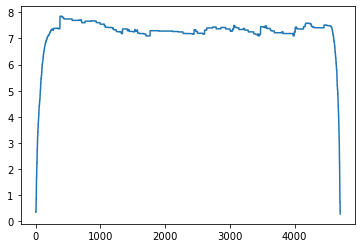

In [35]:
#ABS Avg SM
exog_vars = train_data[["inv_avg","rankdist","googlebuzz"]]
exog = sm.add_constant(exog_vars)
model = PanelOLS(train_data["win"],exog,entity_effects=False)
results = model.fit()
x = results.params
test_data["avg_prob"] = [probability(x["const"],x["inv_avg"],x["rankdist"],x["googlebuzz"],0,0,odds,rankdist,wikibuzz) for odds,rankdist,wikibuzz in zip(test_data["inv_avg"],test_data["rankdist"],test_data["googlebuzz"])]
test_data["kelly"] = [kelly_crit(kelly[0],kelly[1]) for kelly in zip(test_data["avg_prob"],test_data["inv_avg"])]
test_data["profit"] = [profit(prof[0],prof[1],prof[2]) for prof in zip(test_data["kelly"],test_data["inv_avg"],test_data["win"])]
test_data["profit"].describe()
print()
print("no of bets: " + str(len(test_data["profit"])-(test_data["profit"]== 0).sum()))
print("profit: " + str((5160*test_data["profit"].mean())))
print("Mean overround (%): "+str((test_data.sort_values(by="match_id")["inv_avg"].rolling(2).sum()[1::2].mean()-1)*100))
plt.plot(list(test_data["profit"].cumsum()))
print(test_data["profit"].describe())
print("ROI (%): "+str((((test_data["profit"].sum() + test_data["kelly"].sum())/test_data["kelly"].sum())-1)*100))



no of bets: 2582
profit: 4.247619240238221
Mean overround (%): -0.19082898493827383
count    4705.000000
mean        0.000823
std         0.047295
min        -0.571239
25%        -0.001176
50%         0.000000
75%         0.000000
max         0.703680
Name: profit, dtype: float64
ROI (%): 4.2352806671497545


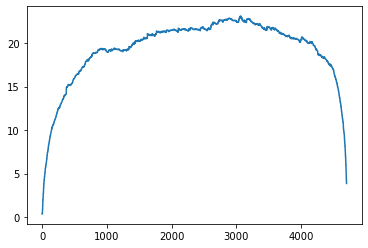

In [40]:
# Abs Best SM
exog_vars = train_data[["inv_avg","rankdist","googlebuzz"]]
exog = sm.add_constant(exog_vars)
model = PanelOLS(train_data["win"],exog,entity_effects=False,other_effects=train_data["year"])
results = model.fit()
x = results.params
test_data["avg_prob"] = [probability(x["const"],x["inv_avg"],x["rankdist"],x["googlebuzz"],0,0,odds,rankdist,wikibuzz) for odds,rankdist,wikibuzz in zip(test_data["inv_avg"],test_data["rankdist"],test_data["googlebuzz"])]
test_data["kelly"] = [kelly_crit(kelly[0],kelly[1]) for kelly in zip(test_data["avg_prob"],test_data["inv_max"])]
test_data["profit"] = [profit(prof[0],prof[1],prof[2]) for prof in zip(test_data["kelly"],test_data["inv_max"],test_data["win"])]
test_data["profit"].describe()
print()
print("no of bets: " + str(len(test_data["profit"])-(test_data["profit"]== 0).sum()))
print("profit: " + str((5160*test_data["profit"].mean())))
print("Mean overround (%): "+str((test_data.sort_values(by="match_id")["inv_max"].rolling(2).sum()[1::2].mean()-1)*100))
plt.plot(list(test_data["profit"].cumsum()))
print(test_data["profit"].describe())
print("ROI (%): "+str((((test_data["profit"].sum() + test_data["kelly"].sum())/test_data["kelly"].sum())-1)*100))


no of bets: 803
profit: 0.13287596338275898
Mean overround (%): 6.473661326570879
count    4705.000000
mean        0.000026
std         0.026237
min        -0.538539
25%         0.000000
50%         0.000000
75%        -0.000000
max         0.410971
Name: profit, dtype: float64
ROI (%): 0.4136054524488397


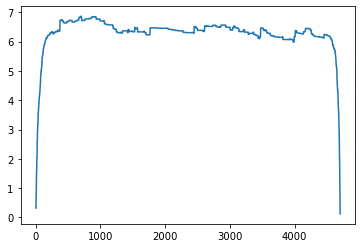

In [41]:
#ABS Bet365 SM
exog_vars = train_data[["inv_avg","rankdist","googlebuzz"]]
exog = sm.add_constant(exog_vars)
model = PanelOLS(train_data["win"],exog,entity_effects=False,other_effects=train_data["year"])
results = model.fit()
x = results.params
test_data["avg_prob"] = [probability(x["const"],x["inv_avg"],x["rankdist"],x["googlebuzz"],0,0,odds,rankdist,wikibuzz) for odds,rankdist,wikibuzz in zip(test_data["inv_avg"],test_data["rankdist"],test_data["googlebuzz"])]
test_data["kelly"] = [kelly_crit(kelly[0],kelly[1]) for kelly in zip(test_data["avg_prob"],test_data["inv_bet365"])]
test_data["profit"] = [profit(prof[0],prof[1],prof[2]) for prof in zip(test_data["kelly"],test_data["inv_bet365"],test_data["win"])]
test_data["profit"].describe()
print()
print("no of bets: " + str(len(test_data["profit"])-(test_data["profit"]== 0).sum()))
print("profit: " + str((5160*test_data["profit"].mean())))
print("Mean overround (%): "+str((test_data.sort_values(by="match_id")["inv_bet365"].rolling(2).sum()[1::2].mean()-1)*100))
plt.plot(list(test_data["profit"].cumsum()))
print(test_data["profit"].describe())
print("ROI (%): "+str((((test_data["profit"].sum() + test_data["kelly"].sum())/test_data["kelly"].sum())-1)*100))


no of bets: 720
profit: 0.1319858069627761
Mean overround (%): 6.473661326570879
count    4705.000000
mean        0.000026
std         0.021471
min        -0.508173
25%        -0.000000
50%        -0.000000
75%         0.000000
max         0.413127
Name: profit, dtype: float64
ROI (%): 0.5507609605057251


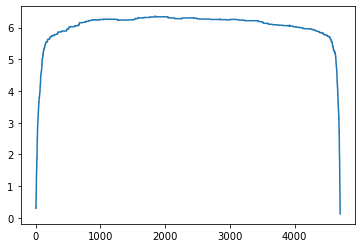

In [42]:
#ABS Bet365 RD 
exog_vars = train_data[["inv_avg","googlebuzz"]]
exog = sm.add_constant(exog_vars)
model = PanelOLS(train_data["win"],exog,entity_effects=False,other_effects=train_data["year"])
results = model.fit()
x = results.params
test_data["avg_prob"] = [probability(x["const"],x["inv_avg"],0,x["googlebuzz"],0,0,odds,rankdist,wikibuzz) for odds,rankdist,wikibuzz in zip(test_data["inv_avg"],test_data["rankdist"],test_data["googlebuzz"])]
test_data["kelly"] = [kelly_crit(kelly[0],kelly[1]) for kelly in zip(test_data["avg_prob"],test_data["inv_bet365"])]
test_data["profit"] = [profit(prof[0],prof[1],prof[2]) for prof in zip(test_data["kelly"],test_data["inv_bet365"],test_data["win"])]
test_data["profit"].describe()
print()
print("no of bets: " + str(len(test_data["profit"])-(test_data["profit"]== 0).sum()))
print("profit: " + str((5160*test_data["profit"].mean())))
print("Mean overround (%): "+str((test_data.sort_values(by="match_id")["inv_bet365"].rolling(2).sum()[1::2].mean()-1)*100))
plt.plot(list(test_data["profit"].cumsum()))
print(test_data["profit"].describe())
print("ROI (%): "+str((((test_data["profit"].sum() + test_data["kelly"].sum())/test_data["kelly"].sum())-1)*100))


no of bets: 544
profit: -0.37715167675385086
Mean overround (%): 6.473661326570879
count    4705.000000
mean       -0.000073
std         0.008039
min        -0.077696
25%         0.000000
50%        -0.000000
75%         0.000000
max         0.194253
Name: profit, dtype: float64
ROI (%): -10.638102004097071


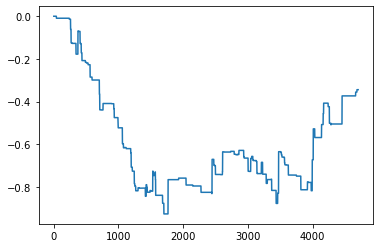

In [43]:
#ABS Bet365 DM
exog_vars = train_data[["inv_avg","rankdist"]]
exog = sm.add_constant(exog_vars)
model = PanelOLS(train_data["win"],exog,entity_effects=False,other_effects=train_data["year"])
results = model.fit()
x = results.params
test_data["avg_prob"] = [probability(x["const"],x["inv_avg"],x["rankdist"],0,0,0,odds,rankdist,wikibuzz) for odds,rankdist,wikibuzz in zip(test_data["inv_avg"],test_data["rankdist"],test_data["googlebuzz"])]
test_data["kelly"] = [kelly_crit(kelly[0],kelly[1]) for kelly in zip(test_data["avg_prob"],test_data["inv_bet365"])]
test_data["profit"] = [profit(prof[0],prof[1],prof[2]) for prof in zip(test_data["kelly"],test_data["inv_bet365"],test_data["win"])]
test_data["profit"].describe()
print()
print("no of bets: " + str(len(test_data["profit"])-(test_data["profit"]== 0).sum()))
print("profit: " + str((5160*test_data["profit"].mean())))
print("Mean overround (%): "+str((test_data.sort_values(by="match_id")["inv_bet365"].rolling(2).sum()[1::2].mean()-1)*100))
plt.plot(list(test_data["profit"].cumsum()))
print(test_data["profit"].describe())
print("ROI (%): "+str((((test_data["profit"].sum() + test_data["kelly"].sum())/test_data["kelly"].sum())-1)*100))

## Original models With Log GoogleBuzz (Original Google Buzz)


no of bets: 529
count    4705.000000
mean       -0.000017
std         0.009811
min        -0.085858
25%        -0.000000
50%         0.000000
75%         0.000000
max         0.354435
Name: profit, dtype: float64
ROI (%): -2.1936161428961043


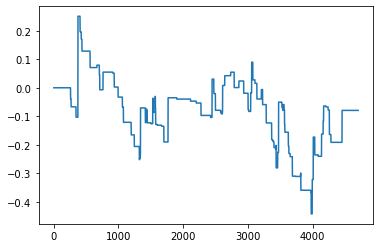

In [44]:
#Log avg SM
exog_vars = train_data[["inv_avg","rankdist","originalgooglebuzz"]]
exog = sm.add_constant(exog_vars)
model = PanelOLS(train_data["win"],exog,entity_effects=False)
results = model.fit()
x = results.params
test_data["avg_prob"] = [probability(x["const"],x["inv_avg"],x["rankdist"],x["originalgooglebuzz"],0,0,odds,rankdist,wikibuzz) for odds,rankdist,wikibuzz in zip(test_data["inv_avg"],test_data["rankdist"],test_data["originalgooglebuzz"])]
test_data["kelly"] = [kelly_crit(kelly[0],kelly[1]) for kelly in zip(test_data["avg_prob"],test_data["inv_avg"])]
test_data["profit"] = [profit(prof[0],prof[1],prof[2]) for prof in zip(test_data["kelly"],test_data["inv_avg"],test_data["win"])]
test_data["profit"].describe()
print()
print("no of bets: " + str(len(test_data["profit"])-(test_data["profit"]== 0).sum()))
plt.plot(list(test_data["profit"].cumsum()))
print(test_data["profit"].describe())
print("ROI (%): "+str((((test_data["profit"].sum() + test_data["kelly"].sum())/test_data["kelly"].sum())-1)*100))


no of bets: 2497
count    4705.000000
mean        0.000033
std         0.032031
min        -0.218402
25%         0.000000
50%         0.000000
75%         0.000000
max         0.559683
Name: profit, dtype: float64
ROI (%): 0.2864525878241375


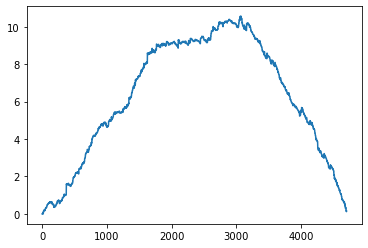

In [45]:
#Log Best SM
exog_vars = train_data[["inv_avg","rankdist","originalgooglebuzz"]]
exog = sm.add_constant(exog_vars)
model = PanelOLS(train_data["win"],exog,entity_effects=False,other_effects=train_data["year"])
results = model.fit()
x = results.params
test_data["avg_prob"] = [probability(x["const"],x["inv_avg"],x["rankdist"],x["originalgooglebuzz"],0,0,odds,rankdist,wikibuzz) for odds,rankdist,wikibuzz in zip(test_data["inv_avg"],test_data["rankdist"],test_data["originalgooglebuzz"])]
test_data["kelly"] = [kelly_crit(kelly[0],kelly[1]) for kelly in zip(test_data["avg_prob"],test_data["inv_max"])]
test_data["profit"] = [profit(prof[0],prof[1],prof[2]) for prof in zip(test_data["kelly"],test_data["inv_max"],test_data["win"])]
test_data["profit"].describe()
print()
print("no of bets: " + str(len(test_data["profit"])-(test_data["profit"]== 0).sum()))
plt.plot(list(test_data["profit"].cumsum()))
print(test_data["profit"].describe())
print("ROI (%): "+str((((test_data["profit"].sum() + test_data["kelly"].sum())/test_data["kelly"].sum())-1)*100))


no of bets: 630
count    4705.000000
mean       -0.000068
std         0.010082
min        -0.114580
25%         0.000000
50%        -0.000000
75%         0.000000
max         0.256121
Name: profit, dtype: float64
ROI (%): -6.742700880467911


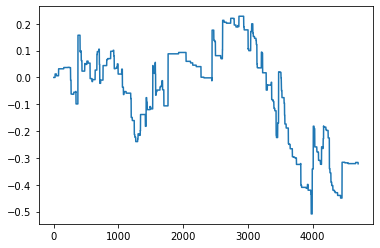

In [46]:
#Log Bet365 SM
exog_vars = train_data[["inv_avg","rankdist","originalgooglebuzz"]]
exog = sm.add_constant(exog_vars)
model = PanelOLS(train_data["win"],exog,entity_effects=False,other_effects=train_data["year"])
results = model.fit()
x = results.params
test_data["avg_prob"] = [probability(x["const"],x["inv_avg"],x["rankdist"],x["originalgooglebuzz"],0,0,odds,rankdist,wikibuzz) for odds,rankdist,wikibuzz in zip(test_data["inv_avg"],test_data["rankdist"],test_data["originalgooglebuzz"])]
test_data["kelly"] = [kelly_crit(kelly[0],kelly[1]) for kelly in zip(test_data["avg_prob"],test_data["inv_bet365"])]
test_data["profit"] = [profit(prof[0],prof[1],prof[2]) for prof in zip(test_data["kelly"],test_data["inv_bet365"],test_data["win"])]
test_data["profit"].describe()
print()
print("no of bets: " + str(len(test_data["profit"])-(test_data["profit"]== 0).sum()))
plt.plot(list(test_data["profit"].cumsum()))
print(test_data["profit"].describe())
print("ROI (%): "+str((((test_data["profit"].sum() + test_data["kelly"].sum())/test_data["kelly"].sum())-1)*100))


no of bets: 531
count    4705.000000
mean       -0.000013
std         0.001999
min        -0.033379
25%        -0.000000
50%         0.000000
75%         0.000000
max         0.043287
Name: profit, dtype: float64
ROI (%): -7.539553154026423


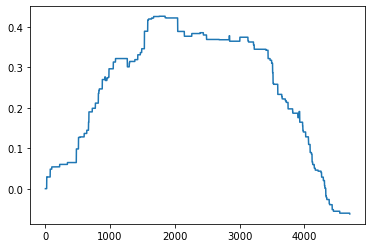

In [47]:
# Log bet365 RD
exog_vars = train_data[["inv_avg","originalgooglebuzz"]]
exog = sm.add_constant(exog_vars)
model = PanelOLS(train_data["win"],exog,entity_effects=False,other_effects=train_data["year"])
results = model.fit()
x = results.params
test_data["avg_prob"] = [probability(x["const"],x["inv_avg"],0,x["originalgooglebuzz"],0,0,odds,rankdist,wikibuzz) for odds,rankdist,wikibuzz in zip(test_data["inv_avg"],test_data["rankdist"],test_data["originalgooglebuzz"])]
test_data["kelly"] = [kelly_crit(kelly[0],kelly[1]) for kelly in zip(test_data["avg_prob"],test_data["inv_bet365"])]
test_data["profit"] = [profit(prof[0],prof[1],prof[2]) for prof in zip(test_data["kelly"],test_data["inv_bet365"],test_data["win"])]
test_data["profit"].describe()
print()
print("no of bets: " + str(len(test_data["profit"])-(test_data["profit"]== 0).sum()))
plt.plot(list(test_data["profit"].cumsum()))
print(test_data["profit"].describe())
print("ROI (%): "+str((((test_data["profit"].sum() + test_data["kelly"].sum())/test_data["kelly"].sum())-1)*100))

## Combined Models


no of bets: 963
count    4705.000000
mean        0.000058
std         0.031924
min        -0.608396
25%        -0.000000
50%         0.000000
75%         0.000000
max         0.459276
Name: profit, dtype: float64
ROI (%): 0.6743895627356666


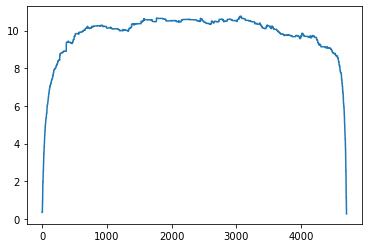

In [48]:
# abs avg CSM
exog_vars = train_data[["inv_avg","rankdist","googlebuzz","wikibuzz"]]
exog = sm.add_constant(exog_vars)
model = PanelOLS(train_data["win"],exog,entity_effects=False,other_effects=train_data["year"])
results = model.fit()
x = results.params
test_data["avg_prob"] = [probability(x["const"],x["inv_avg"],x["rankdist"],x["wikibuzz"],0,0,odds,rankdist,wikibuzz,x["googlebuzz"],googlebuzz) for odds,rankdist,wikibuzz,googlebuzz in zip(test_data["inv_avg"],test_data["rankdist"],test_data["wikibuzz"],test_data["googlebuzz"])]
test_data["kelly"] = [kelly_crit(kelly[0],kelly[1]) for kelly in zip(test_data["avg_prob"],test_data["inv_avg"])]
test_data["profit"] = [profit(prof[0],prof[1],prof[2]) for prof in zip(test_data["kelly"],test_data["inv_avg"],test_data["win"])]
test_data["profit"].describe()
print()
print("no of bets: " + str(len(test_data["profit"])-(test_data["profit"]== 0).sum()))
plt.plot(list(test_data["profit"].cumsum()))
print(test_data["profit"].describe())
print("ROI (%): "+str((((test_data["profit"].sum() + test_data["kelly"].sum())/test_data["kelly"].sum())-1)*100))


no of bets: 743
count    4705.000000
mean       -0.000111
std         0.010551
min        -0.098994
25%        -0.000000
50%         0.000000
75%         0.000000
max         0.338082
Name: profit, dtype: float64
ROI (%): -6.884689757921015


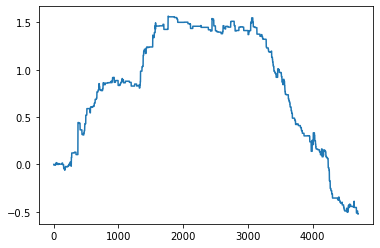

In [49]:
# log avg CSM
exog_vars = train_data[["inv_avg","rankdist","originalgooglebuzz","wikibuzz"]]
exog = sm.add_constant(exog_vars)
model = PanelOLS(train_data["win"],exog,entity_effects=False,other_effects=train_data["year"])
results = model.fit()
x = results.params
test_data["avg_prob"] = [probability(x["const"],x["inv_avg"],x["rankdist"],x["wikibuzz"],0,0,odds,rankdist,wikibuzz,x["originalgooglebuzz"],googlebuzz) for odds,rankdist,wikibuzz,googlebuzz in zip(test_data["inv_avg"],test_data["rankdist"],test_data["wikibuzz"],test_data["originalgooglebuzz"])]
test_data["kelly"] = [kelly_crit(kelly[0],kelly[1]) for kelly in zip(test_data["avg_prob"],test_data["inv_avg"])]
test_data["profit"] = [profit(prof[0],prof[1],prof[2]) for prof in zip(test_data["kelly"],test_data["inv_avg"],test_data["win"])]
test_data["profit"].describe()
print()
print("no of bets: " + str(len(test_data["profit"])-(test_data["profit"]== 0).sum()))
plt.plot(list(test_data["profit"].cumsum()))
print(test_data["profit"].describe())
print("ROI (%): "+str((((test_data["profit"].sum() + test_data["kelly"].sum())/test_data["kelly"].sum())-1)*100))


no of bets: 901
count    4705.000000
mean       -0.000024
std         0.028637
min        -0.583649
25%         0.000000
50%         0.000000
75%        -0.000000
max         0.360023
Name: profit, dtype: float64
ROI (%): -0.32498744424896975


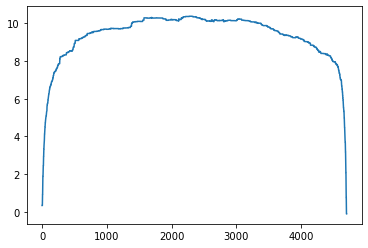

In [50]:
#abs avg CRD
exog_vars = train_data[["inv_avg","googlebuzz","wikibuzz"]]
exog = sm.add_constant(exog_vars)
model = PanelOLS(train_data["win"],exog,entity_effects=False,other_effects=train_data["year"])
results = model.fit()
x = results.params
test_data["avg_prob"] = [probability(x["const"],x["inv_avg"],0,x["wikibuzz"],0,0,odds,0,wikibuzz,x["googlebuzz"],googlebuzz) for odds,rankdist,wikibuzz,googlebuzz in zip(test_data["inv_avg"],test_data["rankdist"],test_data["wikibuzz"],test_data["googlebuzz"])]
test_data["kelly"] = [kelly_crit(kelly[0],kelly[1]) for kelly in zip(test_data["avg_prob"],test_data["inv_avg"])]
test_data["profit"] = [profit(prof[0],prof[1],prof[2]) for prof in zip(test_data["kelly"],test_data["inv_avg"],test_data["win"])]
test_data["profit"].describe()
print()
print("no of bets: " + str(len(test_data["profit"])-(test_data["profit"]== 0).sum()))
plt.plot(list(test_data["profit"].cumsum()))
print(test_data["profit"].describe())
print("ROI (%): "+str((((test_data["profit"].sum() + test_data["kelly"].sum())/test_data["kelly"].sum())-1)*100))


no of bets: 672
count    4705.000000
mean       -0.000114
std         0.006076
min        -0.088677
25%         0.000000
50%        -0.000000
75%        -0.000000
max         0.116919
Name: profit, dtype: float64
ROI (%): -10.520580083272224


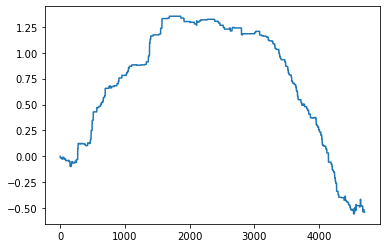

In [51]:
#log avg CRD
exog_vars = train_data[["inv_avg","originalgooglebuzz","wikibuzz"]]
exog = sm.add_constant(exog_vars)
model = PanelOLS(train_data["win"],exog,entity_effects=False,other_effects=train_data["year"])
results = model.fit()
x = results.params
test_data["avg_prob"] = [probability(x["const"],x["inv_avg"],0,x["wikibuzz"],0,0,odds,0,wikibuzz,x["originalgooglebuzz"],googlebuzz) for odds,rankdist,wikibuzz,googlebuzz in zip(test_data["inv_avg"],test_data["rankdist"],test_data["wikibuzz"],test_data["originalgooglebuzz"])]
test_data["kelly"] = [kelly_crit(kelly[0],kelly[1]) for kelly in zip(test_data["avg_prob"],test_data["inv_avg"])]
test_data["profit"] = [profit(prof[0],prof[1],prof[2]) for prof in zip(test_data["kelly"],test_data["inv_avg"],test_data["win"])]
test_data["profit"].describe()
print()
print("no of bets: " + str(len(test_data["profit"])-(test_data["profit"]== 0).sum()))
plt.plot(list(test_data["profit"].cumsum()))
print(test_data["profit"].describe())
print("ROI (%): "+str((((test_data["profit"].sum() + test_data["kelly"].sum())/test_data["kelly"].sum())-1)*100))


no of bets: 959
count    4705.000000
mean        0.000443
std         0.031689
min        -0.555715
25%        -0.000000
50%         0.000000
75%         0.000000
max         0.527808
Name: profit, dtype: float64
ROI (%): 5.695664830999059


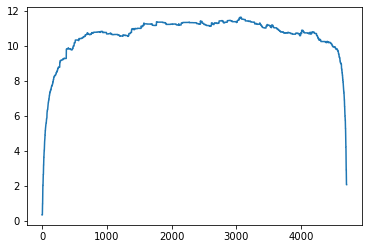

In [52]:
#abs Best CSM
exog_vars = train_data[["inv_avg","rankdist","googlebuzz","wikibuzz"]]
exog = sm.add_constant(exog_vars)
model = PanelOLS(train_data["win"],exog,entity_effects=False,other_effects=train_data["year"])
results = model.fit()
x = results.params
test_data["avg_prob"] = [probability(x["const"],x["inv_avg"],x["rankdist"],x["wikibuzz"],0,0,odds,rankdist,wikibuzz,x["googlebuzz"],googlebuzz) for odds,rankdist,wikibuzz,googlebuzz in zip(test_data["inv_max"],test_data["rankdist"],test_data["wikibuzz"],test_data["googlebuzz"])]
test_data["kelly"] = [kelly_crit(kelly[0],kelly[1]) for kelly in zip(test_data["avg_prob"],test_data["inv_max"])]
test_data["profit"] = [profit(prof[0],prof[1],prof[2]) for prof in zip(test_data["kelly"],test_data["inv_max"],test_data["win"])]
test_data["profit"].describe()
print()
print("no of bets: " + str(len(test_data["profit"])-(test_data["profit"]== 0).sum()))
plt.plot(list(test_data["profit"].cumsum()))
print(test_data["profit"].describe())
print("ROI (%): "+str((((test_data["profit"].sum() + test_data["kelly"].sum())/test_data["kelly"].sum())-1)*100))


no of bets: 738
count    4705.000000
mean        0.000002
std         0.011011
min        -0.091896
25%         0.000000
50%         0.000000
75%         0.000000
max         0.386372
Name: profit, dtype: float64
ROI (%): 0.15875650987400292


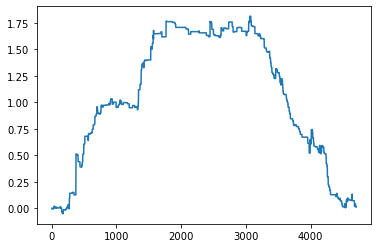

In [53]:
#log Best CSM
exog_vars = train_data[["inv_avg","rankdist","originalgooglebuzz","wikibuzz"]]
exog = sm.add_constant(exog_vars)
model = PanelOLS(train_data["win"],exog,entity_effects=False,other_effects=train_data["year"])
results = model.fit()
x = results.params
test_data["avg_prob"] = [probability(x["const"],x["inv_avg"],x["rankdist"],x["wikibuzz"],0,0,odds,rankdist,wikibuzz,x["originalgooglebuzz"],googlebuzz) for odds,rankdist,wikibuzz,googlebuzz in zip(test_data["inv_max"],test_data["rankdist"],test_data["wikibuzz"],test_data["originalgooglebuzz"])]
test_data["kelly"] = [kelly_crit(kelly[0],kelly[1]) for kelly in zip(test_data["avg_prob"],test_data["inv_max"])]
test_data["profit"] = [profit(prof[0],prof[1],prof[2]) for prof in zip(test_data["kelly"],test_data["inv_max"],test_data["win"])]
test_data["profit"].describe()
print()
print("no of bets: " + str(len(test_data["profit"])-(test_data["profit"]== 0).sum()))
plt.plot(list(test_data["profit"].cumsum()))
print(test_data["profit"].describe())
print("ROI (%): "+str((((test_data["profit"].sum() + test_data["kelly"].sum())/test_data["kelly"].sum())-1)*100))


no of bets: 919
count    4705.000000
mean        0.000280
std         0.028453
min        -0.535156
25%         0.000000
50%         0.000000
75%        -0.000000
max         0.408030
Name: profit, dtype: float64
ROI (%): 4.080519905370172


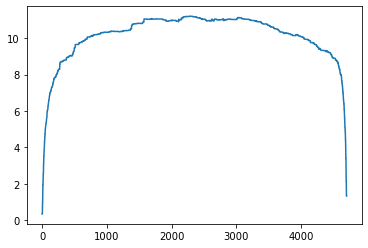

In [54]:
#abs best CRD

exog_vars = train_data[["inv_avg","googlebuzz","wikibuzz"]]
exog = sm.add_constant(exog_vars)
model = PanelOLS(train_data["win"],exog,entity_effects=False,other_effects=train_data["year"])
results = model.fit()
x = results.params
test_data["avg_prob"] = [probability(x["const"],x["inv_avg"],0,x["wikibuzz"],0,0,odds,0,wikibuzz,x["googlebuzz"],googlebuzz) for odds,rankdist,wikibuzz,googlebuzz in zip(test_data["inv_max"],test_data["rankdist"],test_data["wikibuzz"],test_data["googlebuzz"])]
test_data["kelly"] = [kelly_crit(kelly[0],kelly[1]) for kelly in zip(test_data["avg_prob"],test_data["inv_max"])]
test_data["profit"] = [profit(prof[0],prof[1],prof[2]) for prof in zip(test_data["kelly"],test_data["inv_max"],test_data["win"])]
test_data["profit"].describe()
print()
print("no of bets: " + str(len(test_data["profit"])-(test_data["profit"]== 0).sum()))
plt.plot(list(test_data["profit"].cumsum()))
print(test_data["profit"].describe())
print("ROI (%): "+str((((test_data["profit"].sum() + test_data["kelly"].sum())/test_data["kelly"].sum())-1)*100))


no of bets: 675
count    4705.000000
mean       -0.000054
std         0.006393
min        -0.084589
25%         0.000000
50%         0.000000
75%         0.000000
max         0.136155
Name: profit, dtype: float64
ROI (%): -5.5145630432151265


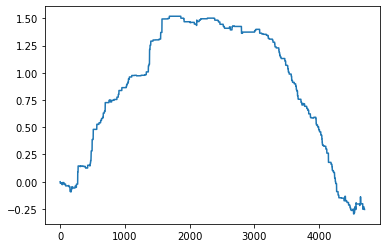

In [55]:
#log best CRD

exog_vars = train_data[["inv_avg","originalgooglebuzz","wikibuzz"]]
exog = sm.add_constant(exog_vars)
model = PanelOLS(train_data["win"],exog,entity_effects=False,other_effects=train_data["year"])
results = model.fit()
x = results.params
test_data["avg_prob"] = [probability(x["const"],x["inv_avg"],0,x["wikibuzz"],0,0,odds,0,wikibuzz,x["originalgooglebuzz"],googlebuzz) for odds,rankdist,wikibuzz,googlebuzz in zip(test_data["inv_max"],test_data["rankdist"],test_data["wikibuzz"],test_data["originalgooglebuzz"])]
test_data["kelly"] = [kelly_crit(kelly[0],kelly[1]) for kelly in zip(test_data["avg_prob"],test_data["inv_max"])]
test_data["profit"] = [profit(prof[0],prof[1],prof[2]) for prof in zip(test_data["kelly"],test_data["inv_max"],test_data["win"])]
test_data["profit"].describe()
print()
print("no of bets: " + str(len(test_data["profit"])-(test_data["profit"]== 0).sum()))
plt.plot(list(test_data["profit"].cumsum()))
print(test_data["profit"].describe())
print("ROI (%): "+str((((test_data["profit"].sum() + test_data["kelly"].sum())/test_data["kelly"].sum())-1)*100))


no of bets: 963
count    4705.000000
mean       -0.000030
std         0.032197
min        -0.598618
25%         0.000000
50%         0.000000
75%         0.000000
max         0.426409
Name: profit, dtype: float64
ROI (%): -0.3388741794099426


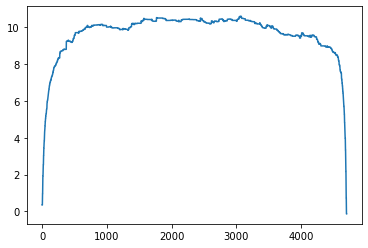

In [56]:
#abs 365 CSM
exog_vars = train_data[["inv_avg","rankdist","googlebuzz","wikibuzz"]]
exog = sm.add_constant(exog_vars)
model = PanelOLS(train_data["win"],exog,entity_effects=False,other_effects=train_data["year"])
results = model.fit()
x = results.params
test_data["avg_prob"] = [probability(x["const"],x["inv_avg"],x["rankdist"],x["wikibuzz"],0,0,odds,rankdist,wikibuzz,x["googlebuzz"],googlebuzz) for odds,rankdist,wikibuzz,googlebuzz in zip(test_data["inv_bet365"],test_data["rankdist"],test_data["wikibuzz"],test_data["googlebuzz"])]
test_data["kelly"] = [kelly_crit(kelly[0],kelly[1]) for kelly in zip(test_data["avg_prob"],test_data["inv_bet365"])]
test_data["profit"] = [profit(prof[0],prof[1],prof[2]) for prof in zip(test_data["kelly"],test_data["inv_bet365"],test_data["win"])]
test_data["profit"].describe()
print()
print("no of bets: " + str(len(test_data["profit"])-(test_data["profit"]== 0).sum()))
plt.plot(list(test_data["profit"].cumsum()))
print(test_data["profit"].describe())
print("ROI (%): "+str((((test_data["profit"].sum() + test_data["kelly"].sum())/test_data["kelly"].sum())-1)*100))


no of bets: 744
count    4705.000000
mean       -0.000120
std         0.010417
min        -0.099963
25%         0.000000
50%         0.000000
75%         0.000000
max         0.314923
Name: profit, dtype: float64
ROI (%): -7.381693894253294


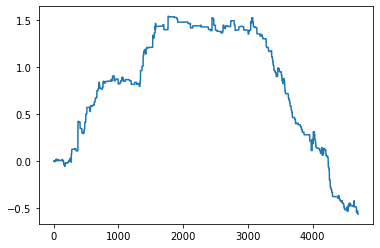

In [57]:
#log 365 CSM
exog_vars = train_data[["inv_avg","rankdist","originalgooglebuzz","wikibuzz"]]
exog = sm.add_constant(exog_vars)
model = PanelOLS(train_data["win"],exog,entity_effects=False,other_effects=train_data["year"])
results = model.fit()
x = results.params
test_data["avg_prob"] = [probability(x["const"],x["inv_avg"],x["rankdist"],x["wikibuzz"],0,0,odds,rankdist,wikibuzz,x["originalgooglebuzz"],googlebuzz) for odds,rankdist,wikibuzz,googlebuzz in zip(test_data["inv_bet365"],test_data["rankdist"],test_data["wikibuzz"],test_data["originalgooglebuzz"])]
test_data["kelly"] = [kelly_crit(kelly[0],kelly[1]) for kelly in zip(test_data["avg_prob"],test_data["inv_bet365"])]
test_data["profit"] = [profit(prof[0],prof[1],prof[2]) for prof in zip(test_data["kelly"],test_data["inv_bet365"],test_data["win"])]
test_data["profit"].describe()
print()
print("no of bets: " + str(len(test_data["profit"])-(test_data["profit"]== 0).sum()))
plt.plot(list(test_data["profit"].cumsum()))
print(test_data["profit"].describe())
print("ROI (%): "+str((((test_data["profit"].sum() + test_data["kelly"].sum())/test_data["kelly"].sum())-1)*100))


no of bets: 899
count    4705.000000
mean       -0.000100
std         0.028876
min        -0.574648
25%         0.000000
50%         0.000000
75%        -0.000000
max         0.373420
Name: profit, dtype: float64
ROI (%): -1.3051910838210556


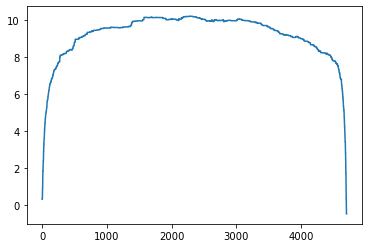

In [58]:
#abs 365 CRD
exog_vars = train_data[["inv_avg","googlebuzz","wikibuzz"]]
exog = sm.add_constant(exog_vars)
model = PanelOLS(train_data["win"],exog,entity_effects=False,other_effects=train_data["year"])
results = model.fit()
x = results.params
test_data["avg_prob"] = [probability(x["const"],x["inv_avg"],0,x["wikibuzz"],0,0,odds,0,wikibuzz,x["googlebuzz"],googlebuzz) for odds,rankdist,wikibuzz,googlebuzz in zip(test_data["inv_bet365"],test_data["rankdist"],test_data["wikibuzz"],test_data["googlebuzz"])]
test_data["kelly"] = [kelly_crit(kelly[0],kelly[1]) for kelly in zip(test_data["avg_prob"],test_data["inv_bet365"])]
test_data["profit"] = [profit(prof[0],prof[1],prof[2]) for prof in zip(test_data["kelly"],test_data["inv_bet365"],test_data["win"])]
test_data["profit"].describe()
print()
print("no of bets: " + str(len(test_data["profit"])-(test_data["profit"]== 0).sum()))
plt.plot(list(test_data["profit"].cumsum()))
print(test_data["profit"].describe())
print("ROI (%): "+str((((test_data["profit"].sum() + test_data["kelly"].sum())/test_data["kelly"].sum())-1)*100))


no of bets: 669
profit: -0.6150867360865974
count    4707.000000
mean       -0.000119
std         0.006033
min        -0.087934
25%        -0.000000
50%         0.000000
75%         0.000000
max         0.108196
Name: profit, dtype: float64
ROI (%): -10.925863483528286


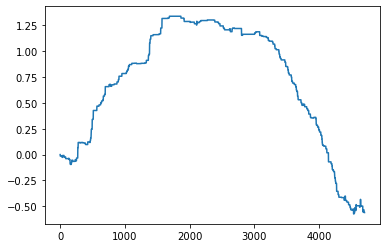

In [30]:
#log 365 CRD
exog_vars = train_data[["inv_avg","originalgooglebuzz","wikibuzz"]]
exog = sm.add_constant(exog_vars)
model = PanelOLS(train_data["win"],exog,entity_effects=False,other_effects=train_data["year"])
results = model.fit()
x = results.params
test_data["avg_prob"] = [probability(x["const"],x["inv_avg"],0,x["wikibuzz"],0,0,odds,0,wikibuzz,x["originalgooglebuzz"],googlebuzz) for odds,rankdist,wikibuzz,googlebuzz in zip(test_data["inv_bet365"],test_data["rankdist"],test_data["wikibuzz"],test_data["originalgooglebuzz"])]
test_data["kelly"] = [kelly_crit(kelly[0],kelly[1]) for kelly in zip(test_data["avg_prob"],test_data["inv_bet365"])]
test_data["profit"] = [profit(prof[0],prof[1],prof[2]) for prof in zip(test_data["kelly"],test_data["inv_bet365"],test_data["win"])]
test_data["profit"].describe()
print()
print("no of bets: " + str(len(test_data["profit"])-(test_data["profit"]== 0).sum()))
plt.plot(list(test_data["profit"].cumsum()))
print(test_data["profit"].describe())
print("ROI (%): "+str((((test_data["profit"].sum() + test_data["kelly"].sum())/test_data["kelly"].sum())-1)*100))